# Pima Indians Diabetes Database

### 3. Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
import sqlite3
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from nltk.stem.porter import PorterStemmer


from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

### 3.1. Reading Data

In [2]:
diabetes = pd.read_csv('diabetes.csv')
print(diabetes.columns)
print('\nNumber of data points : ', diabetes.shape[0])
print(' Number of features : ', diabetes.shape[1])
print('\nFeatures : ', diabetes.columns.values)


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Number of data points :  768
 Number of features :  9

Features :  ['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age' 'Outcome']


In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.shape

(768, 9)

### Preprocessing of data

In [5]:
diabetes_copy = diabetes.copy(deep = True)
diabetes_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


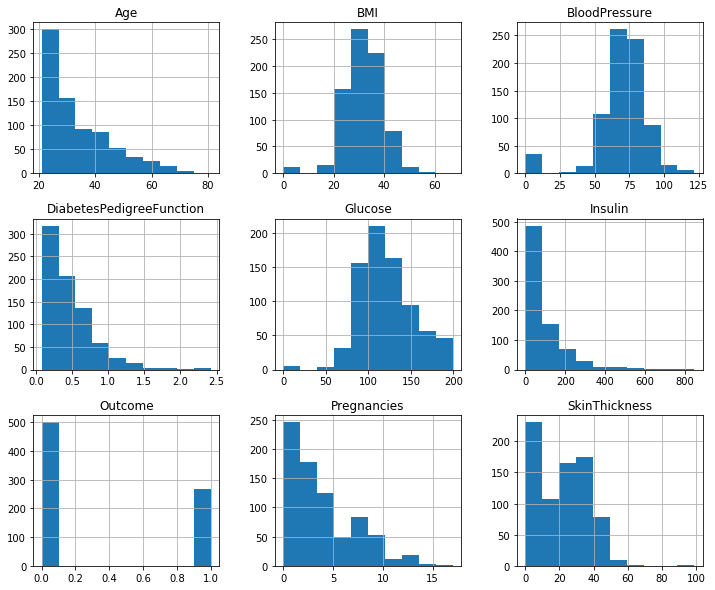

In [6]:
df = diabetes.hist(figsize=(12,10))

In [7]:
diabetes_copy['Glucose'].fillna(diabetes_copy['Glucose'].median(), inplace = True)
diabetes_copy['BloodPressure'].fillna(diabetes_copy['BloodPressure'].median(), inplace = True)
diabetes_copy['SkinThickness'].fillna(diabetes_copy['SkinThickness'].median(), inplace = True)
diabetes_copy['Insulin'].fillna(diabetes_copy['Insulin'].median(), inplace = True)
diabetes_copy['BMI'].fillna(diabetes_copy['BMI'].median(), inplace = True)

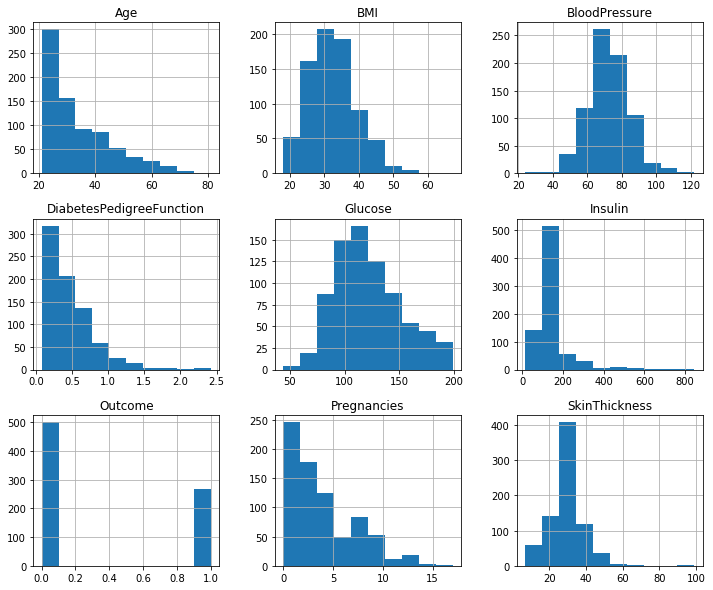

In [8]:
#p 
df2 = diabetes_copy.hist(figsize=(12,10))

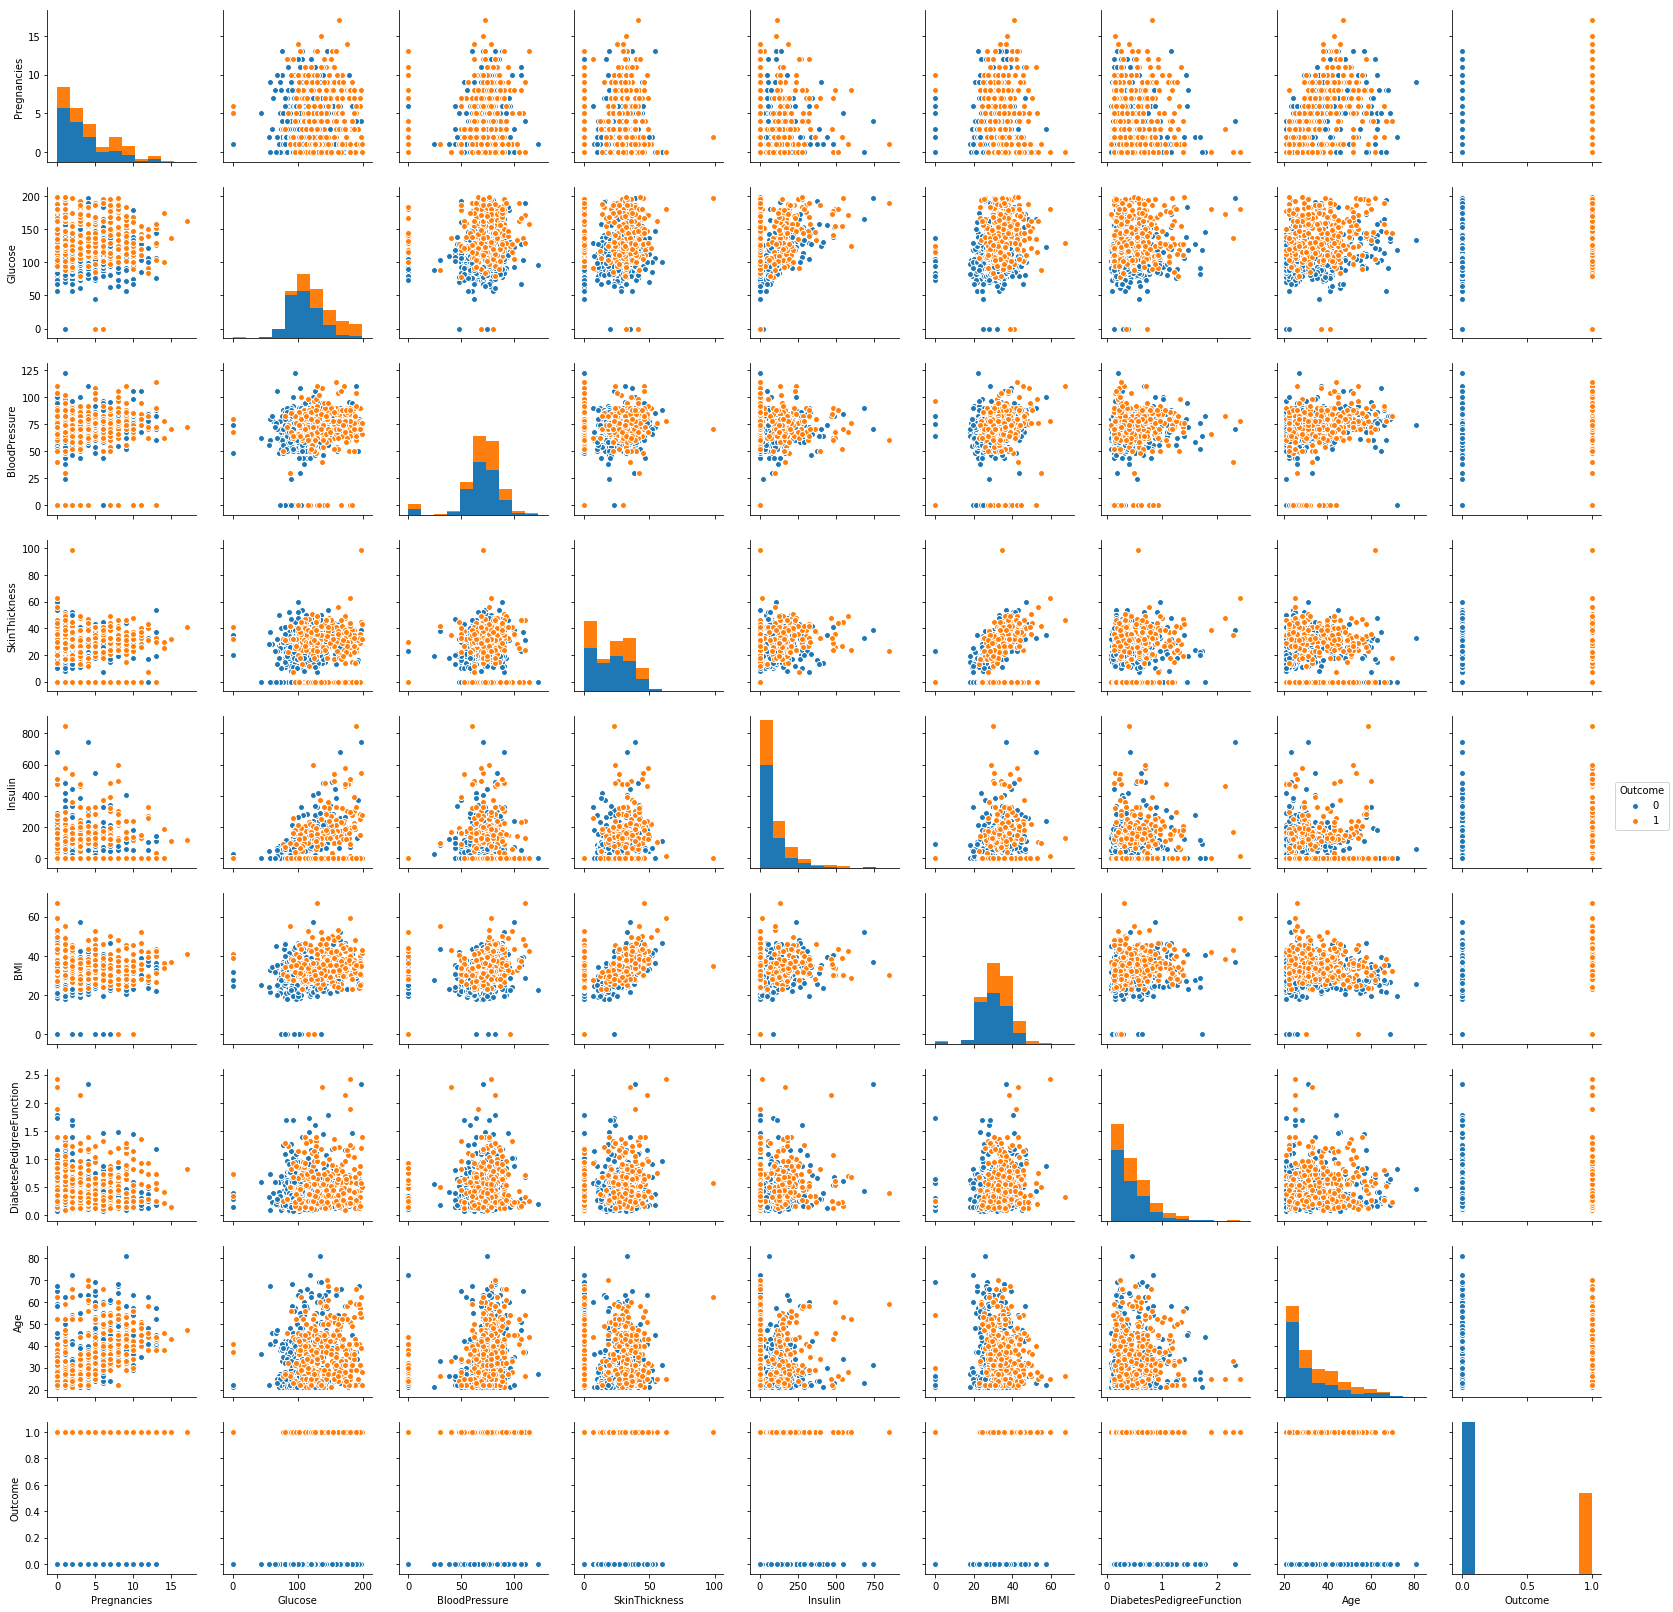

In [9]:
sns.pairplot(diabetes,hue='Outcome')

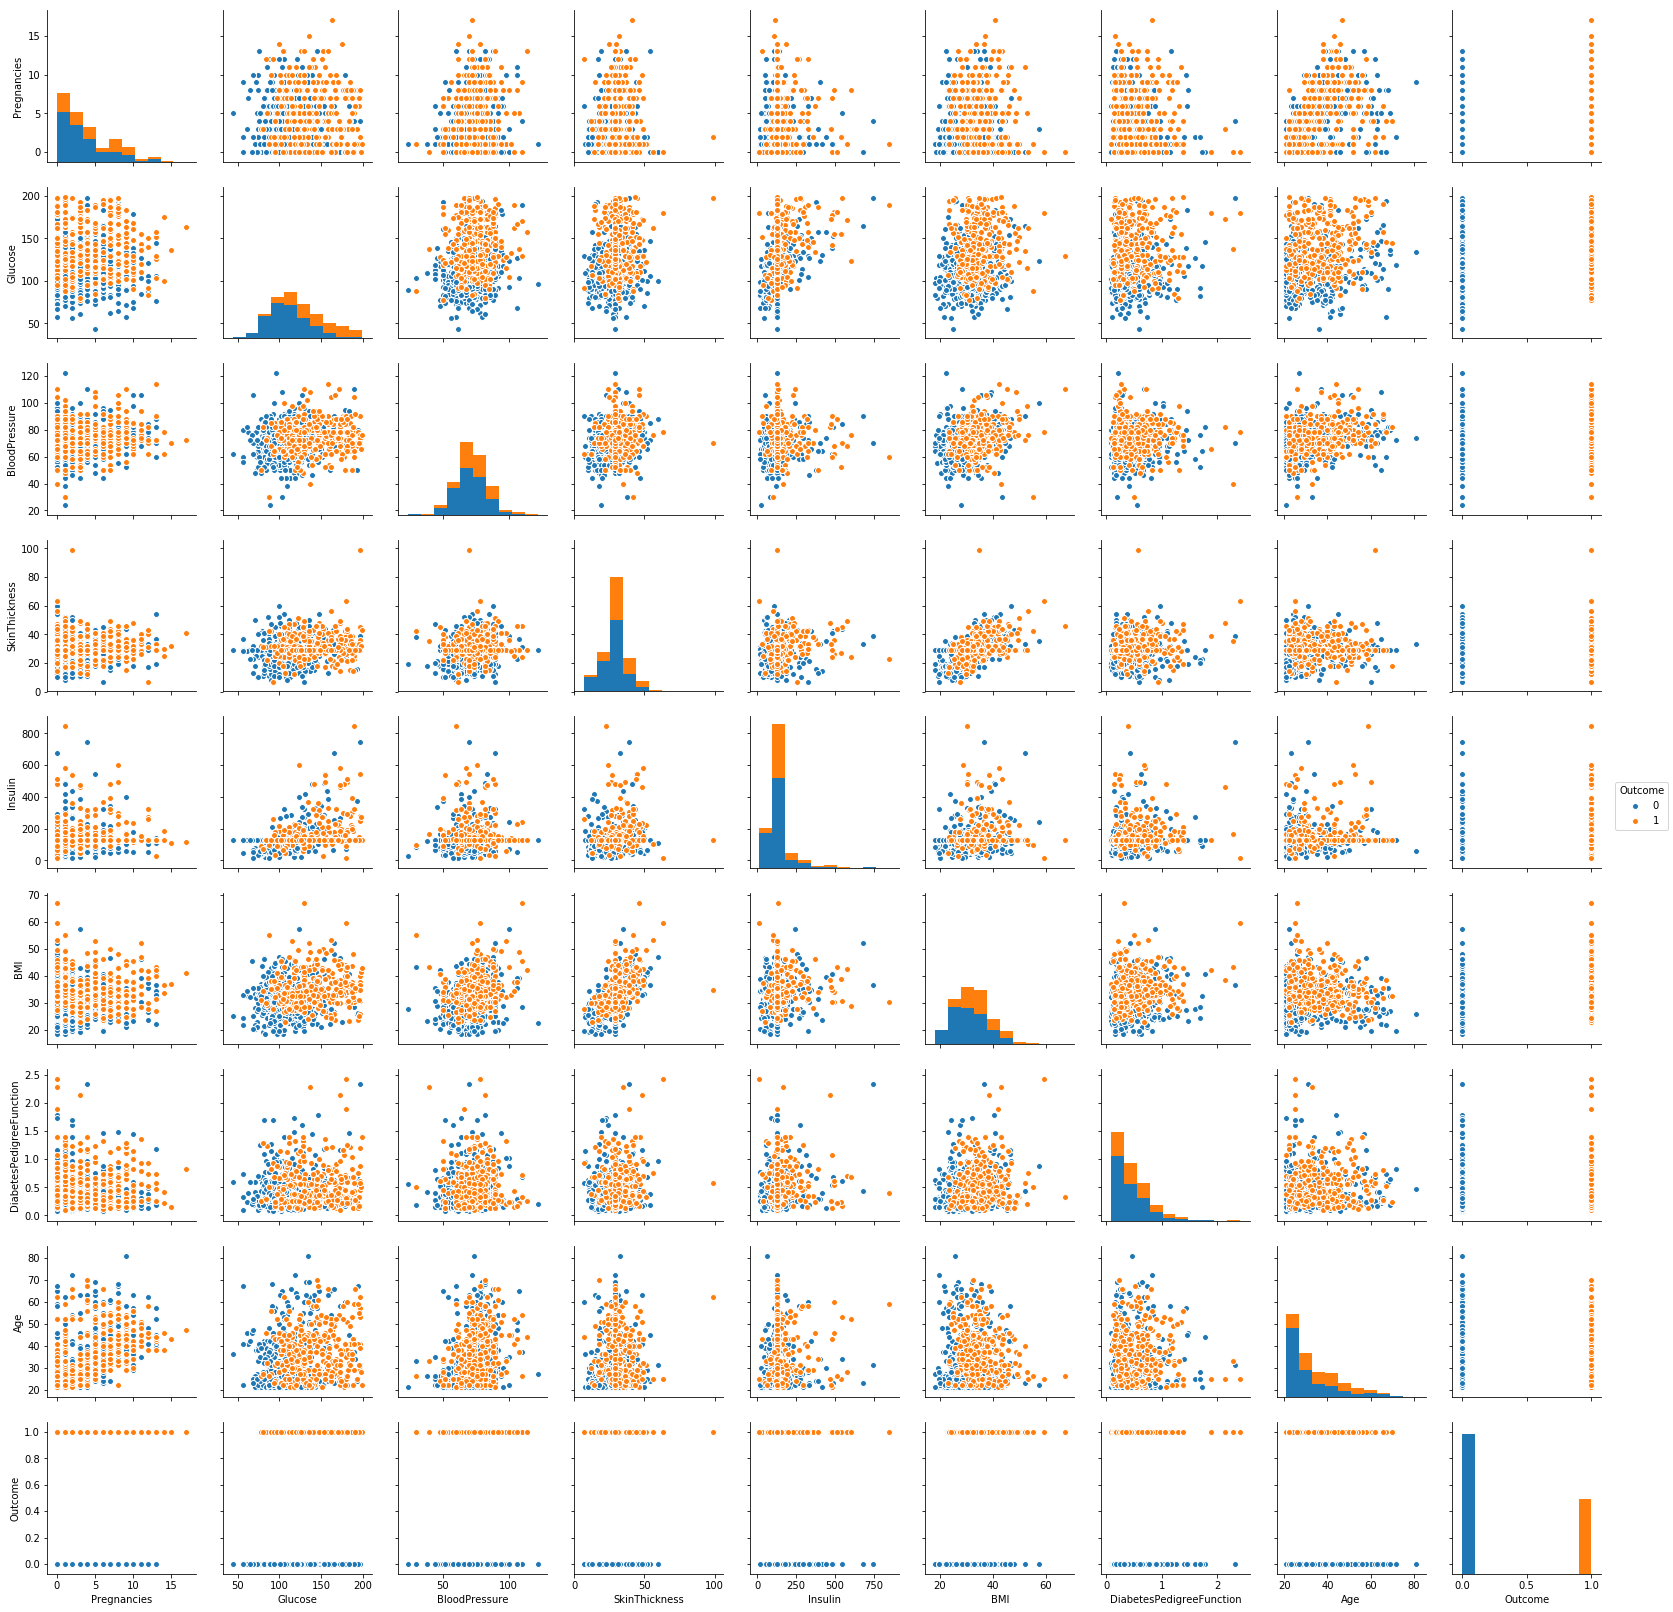

In [10]:
sns.pairplot(diabetes_copy, hue = 'Outcome')

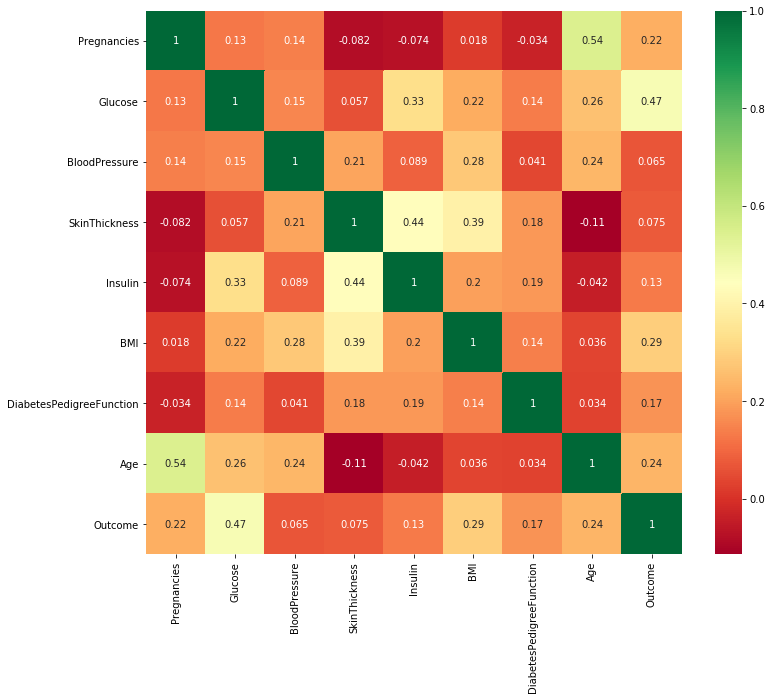

In [11]:
plt.figure(figsize=(12,10))
p=sns.heatmap(diabetes.corr(), annot=True,cmap ='RdYlGn')  

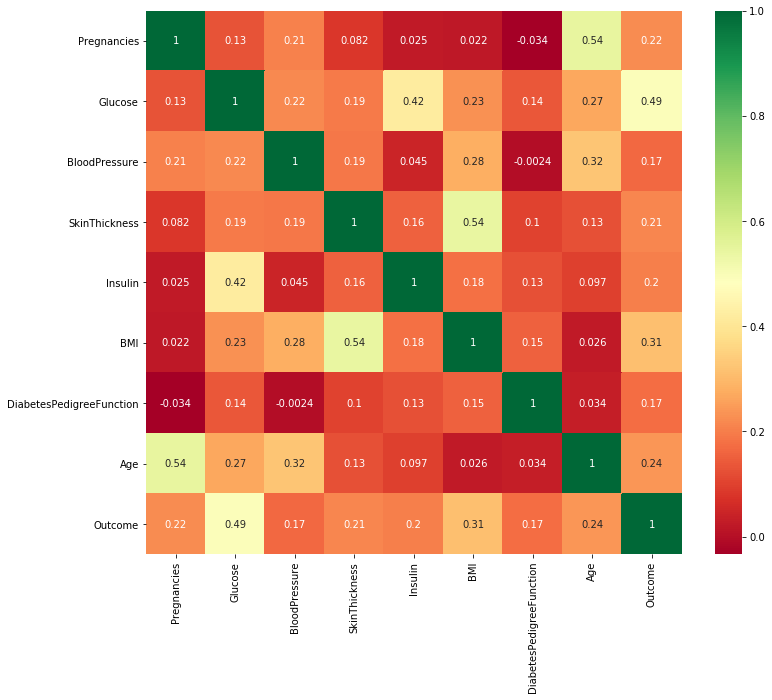

In [12]:
plt.figure(figsize=(12,10))
p=sns.heatmap(diabetes_copy.corr(), annot=True,cmap ='RdYlGn')  

In [13]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X =  pd.DataFrame(s.fit_transform(diabetes_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])

In [14]:
y = diabetes_copy.Outcome

#### Splitting data into train, test and cross validation (64:20:16)

In [15]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', X_test.shape[0])

Number of data points in train data: 614
Number of data points in test data: 154


## ML Models

In [17]:


# Import the slearn utility to compare algorithms
from sklearn import model_selection
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBClassifier 
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC_lin', SVC(kernel="linear")))
models.append(('SVC_rbf', SVC(kernel="rbf")))
models.append(('LSVC', LinearSVC()))
models.append(('RFC', RandomForestClassifier()))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('XGB', XGBClassifier()))

In [18]:
# Prepare the configuration to run the test
seed = 9
results = []
names = []
X = X_train
Y = y_train

In [19]:
# Every algorithm is tested and results are
# collected and printed
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.763934 (0.062926)
KNN: 0.744236 (0.044908)
NB: 0.744157 (0.052273)
SVC_lin: 0.768747 (0.060924)
SVC_rbf: 0.754098 (0.058642)
LSVC: 0.760682 (0.064072)
RFC: 0.734320 (0.071838)
DTR: 0.692147 (0.080603)
XGB: 0.760471 (0.052592)


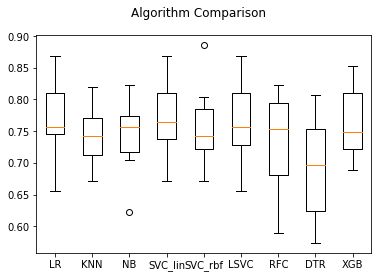

In [20]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1.0, 10.0, 50.0],'kernel': ['linear']}
model_svc = SVC()
grid_search = GridSearchCV(model_svc, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

C:\Users\CHALLA VENKAT RAO\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1.0, 10.0, 50.0],
                         'kernel': ['linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [22]:

# Print the bext score found and best_estimator
print("Best score: %0.2f%%" % (100*grid_search.best_score_))
print("Best estimator for parameter C: %f" % (grid_search.best_estimator_.C))





Best score: 77.36%
Best estimator for parameter C: 0.010000


### Apply the parameters to the model and train it

In [23]:
# Create an instance of the algorithm using parameters
# from best_estimator_ property
svc = grid_search.best_estimator_

# Use the whole dataset to train the model
X = np.append(X_train, X_test, axis=0)
Y = np.append(y_train, y_test, axis=0)

# Train the model
svc.fit(X, Y)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### Make a Prediction

In [27]:
# We create a new (fake) person having the three most correated values high
new_df = pd.DataFrame([[6, 168, 72, 35, 0, 43.6, 0.627, 65]])
# We scale those values like the others
new_df_scaled = s.transform(new_df)

In [28]:
# We predict the outcome
prediction = svc.predict(new_df_scaled)

In [29]:
# A value of "1" means that this person is likley to have type 2 diabetes
prediction

array([1], dtype=int64)

### Conclusion

We finally find a score of 77% using SVC with linear kernel algorithm and parameters optimisation. Please note that there may be still space for further analysis and optimisation, for example trying different data transformations or trying algorithms that haven't been tested yet. Once again I want to repeat that training a machine learning model to solve a problem with a specific dataset is improve process.